In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm,tqdm_notebook
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [40]:
#ref - https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# Basic Libs..
import warnings
warnings.filterwarnings("ignore")
import math
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
from tqdm import tqdm,tqdm_notebook
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text Libs..
import re
from gensim import corpora, models
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# DL Libs..

CWD is  /home/ec2-user/IS434/New Run5


In [41]:
df_train = pd.read_csv('train.tsv', '\t')
df_train = df_train.sample(n = 500_000)
df_train_split ,df_test_split = train_test_split(df_train,test_size = 0.25)

In [42]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
792709,792709,Matilda Jane march promo blanket,1,Kids/Other/Other,NaN,59.0,0,BNWT very soft!
1133593,1133593,Adjustable height clothes rod,2,Home/Storage & Organization/Clothing & Closet ...,NaN,14.0,0,"Stands alone easy assembly. 35"" rod Height 33""..."
666900,666900,How To Train Your Dragon Toothless Tee,3,Men/Tops/T-shirts,Hot Topic,7.0,0,NEED GONE ASAP!
1433647,1433647,Victoria Secret sport bra,2,Women/Athletic Apparel/Sports Bras,Victoria's Secret,14.0,0,VS cross back sports bra with thick adjustable...
355907,355907,Nike Rally Rose Gold Pullover Hoodie,3,Women/Sweaters/Hooded,Nike,39.0,0,Nike Rally funnel neck pullover hoodie - rose ...


# Missing Data

After conducting an EDA on our dataset, we observed that name and category_name has missing data.  
We will feel the missing data with "Missing"

In [43]:
def fill_missing_data(data):
    data.brand_name.fillna(value = "Missing", inplace = True)
    data.category_name.fillna(value = "Missing", inplace = True)

fill_missing_data(df_train_split)
fill_missing_data(df_test_split)

# Remove outliers in Price Column

In [44]:
df_train_split[df_train_split["price"] < 3].count()

train_id             230
name                 230
item_condition_id    230
category_name        230
brand_name           230
price                230
shipping             230
item_description     230
dtype: int64

In [45]:
df_train_split[df_train_split["price"] > 2000].count()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

In [46]:
df_train_split = df_train_split[(df_train_split.price >= 3)]
df_test_split = df_test_split[(df_test_split.price >= 3)]

Log(Price)

In [47]:
df_train_split['log_price'] = np.log1p(df_train_split['price'])
df_test_split['log_price'] = np.log1p(df_test_split['price'])

# Tokenize

## Category_name column

In [48]:
cat_unique = pd.Series("/".join(df_train_split["category_name"].unique().astype("str")).split("/")).unique()

In [49]:
print(len(cat_unique))

874


In [50]:
CV_category = CountVectorizer(vocabulary = cat_unique ,lowercase = False, binary = True)

In [51]:
CV_category.fit(df_train_split["category_name"])
df_train_transform = CV_category.transform(df_train_split["category_name"])
df_test_transform = CV_category.transform(df_test_split['category_name'])

#creates a matrix in which each unique word is represented by a column of the matrix,
#and each text sample from the document is a row in the matrix. 
#The value of each cell is nothing but the count of the word in that particular text sample. 
print(df_train_transform.shape, df_test_transform.shape)

(374770, 874) (124912, 874)


In [52]:
CV_category.get_feature_names()

['Men',
 'Athletic Apparel',
 'Shorts',
 'Kids',
 'Girls 2T-5T',
 'Accessories',
 'Women',
 'Shoes',
 'Fashion Sneakers',
 'Toys',
 'Dolls & Accessories',
 'Beauty',
 'Makeup',
 'Face',
 "Women's Handbags",
 'Messenger & Crossbody',
 'Electronics',
 'Video Games & Consoles',
 'Consoles',
 'Tops & Blouses',
 'Tunic',
 'Boys 0-24 Mos',
 'Jewelry',
 'Bracelets',
 'Skin Care',
 "Women's Accessories",
 'Hair Accessories',
 'Sweaters',
 'Collared',
 'Vintage & Collectibles',
 'Trading Cards',
 'Animation',
 'Shirts & Tops',
 "Men's Accessories",
 'Backpacks, Bags & Briefcases',
 'Flats',
 'Full Zip',
 'Computers & Tablets',
 'Laptops & Netbooks',
 'Necklaces',
 'Bottoms',
 'Eyes',
 'Other',
 'Magazines',
 'Lifestyle & Cultures',
 'Girls (4+)',
 'Tops & T-Shirts',
 'Home',
 'Kitchen & Dining',
 'Coffee & Tea Accessories',
 'Girls 0-24 Mos',
 'Boots',
 'Daily & Travel items',
 'Medical Supplies & Equipment',
 'T-Shirts',
 'Pants',
 'Capris, Cropped',
 'Pants, Tights, Leggings',
 'Belts',
 'Din

In [53]:
df_train_transform.toarray()

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
CV_category.vocabulary_

{'Men': 0,
 'Athletic Apparel': 1,
 'Shorts': 2,
 'Kids': 3,
 'Girls 2T-5T': 4,
 'Accessories': 5,
 'Women': 6,
 'Shoes': 7,
 'Fashion Sneakers': 8,
 'Toys': 9,
 'Dolls & Accessories': 10,
 'Beauty': 11,
 'Makeup': 12,
 'Face': 13,
 "Women's Handbags": 14,
 'Messenger & Crossbody': 15,
 'Electronics': 16,
 'Video Games & Consoles': 17,
 'Consoles': 18,
 'Tops & Blouses': 19,
 'Tunic': 20,
 'Boys 0-24 Mos': 21,
 'Jewelry': 22,
 'Bracelets': 23,
 'Skin Care': 24,
 "Women's Accessories": 25,
 'Hair Accessories': 26,
 'Sweaters': 27,
 'Collared': 28,
 'Vintage & Collectibles': 29,
 'Trading Cards': 30,
 'Animation': 31,
 'Shirts & Tops': 32,
 "Men's Accessories": 33,
 'Backpacks, Bags & Briefcases': 34,
 'Flats': 35,
 'Full Zip': 36,
 'Computers & Tablets': 37,
 'Laptops & Netbooks': 38,
 'Necklaces': 39,
 'Bottoms': 40,
 'Eyes': 41,
 'Other': 42,
 'Magazines': 43,
 'Lifestyle & Cultures': 44,
 'Girls (4+)': 45,
 'Tops & T-Shirts': 46,
 'Home': 47,
 'Kitchen & Dining': 48,
 'Coffee & Tea A

Truncated SVD for feature importance

What is SVD?
SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

It helps with dimensionality reduction.



In [55]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=1)
svd.fit(df_train_transform)

TruncatedSVD(n_components=100, n_iter=1)

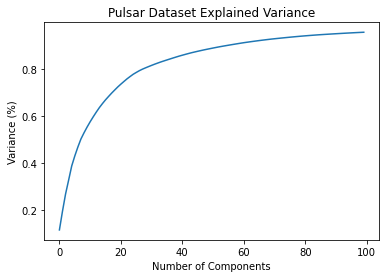

In [56]:
plt.figure()
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

with K = 80, we get an explained variance above 90%(?).Hence, 80 features or words explain 90% of our data.

We can just use these top components as our features.

## Name column

In [57]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['name'].values) 


# train_name = vectorizer.transform(df_train_split['name'].values)
# test_name = vectorizer.transform(df_test_split['name'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [58]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
stop_words = stopwords.words('english')

def preprocess(sentence):
    sentence=str(sentence)
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)

df_train_split['name_process']=df_train_split['name'].map(lambda s:preprocess(s))
df_test_split['name_process']=df_test_split['name'].map(lambda s:preprocess(s))


In [59]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train_split['name_process'].values) 


train_name = vectorizer.transform(df_train_split['name_process'].values)
test_name = vectorizer.transform(df_test_split['name_process'].values)

print("After vectorizations")
print(train_name.shape)

print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(374770, 7043)
['aaron', 'ab', 'abalon', 'abbi', 'abc', 'abercrombi', 'abh', 'about', 'abov', 'absolu', 'absolut', 'abstract', 'acacia', 'academi', 'accent', 'access', 'accessori', 'accordion', 'accu', 'acdc', 'ace', 'acer', 'acg', 'acid', 'acn', 'acoust', 'acqua', 'acryl', 'act', 'action', 'activ', 'activewear', 'actual', 'acuvu', 'adam', 'adapt', 'adaptor', 'add', 'addi', 'addict', 'addida', 'addit', 'address', 'adelin', 'aden', 'adhes', 'adi', 'adida', 'adjust', 'ador', 'adrianna', 'adrienn', 'adult', 'advanc', 'advantag', 'adventur', 'advisori', 'advocar', 'aeo', 'aeri', 'aero', 'aeropostal', 'aerosol', 'aesthet', 'afflict', 'african', 'after', 'afterglow', 'against', 'agat', 'agd', 'age', 'ageless', 'agenda', 'agent', 'aggi', 'agn', 'ahhhsugarsugar', 'aid', 'aiden', 'aigner', 'aiko', 'aio', 'air', 'airbrush', 'airmax', 'airplan', 'airport', 'airsoft', 'airspun', 'airwalk', 'airwick', 'alabama', 'aladdin', 'alarm', 'albert', 'album', 'alcatel', 'alchemist', 'al

# Item Description

In [60]:
# function to decontract phrases
#https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def text_process(text):
    stop_words = stopwords.words('english')
    processed = []
    desc_length_tokenized = []
    for sentence in tqdm_notebook(text):
        sentence_decontracted = decontracted(sentence)
        sentence_decontracted = sentence_decontracted.replace('\\"', ' ')
        sentence_decontracted = sentence_decontracted.replace('\\`', ' ')
        sentence_decontracted = re.sub(r"[^0-9a-zA-Z]+", ' ', sentence_decontracted)
        text_tokens = word_tokenize(sentence_decontracted)
        desc_length_tokenized.append(len(text_tokens))
        joined_words = " ".join(word for word in text_tokens if word not in stop_words)
        processed.append(joined_words)
    return processed, desc_length_tokenized

In [61]:
df_train_split['item_description'] = df_train_split['item_description'].replace([np.nan],"No Description")
df_test_split['item_description'] = df_test_split['item_description'].replace([np.nan],"No Description")

In [62]:
df_train_split['item_desc_processed'], df_train_split['item_desc_length_tokenized'] = text_process(df_train_split['item_description'])
df_test_split['item_desc_processed'], df_test_split['item_desc_length_tokenized'] = text_process(df_test_split['item_description'])

In [63]:
df_train_split['item_desc_processed_2']=df_train_split['item_description'].map(lambda s:preprocess(s))
df_test_split['item_desc_processed_2']=df_test_split['item_description'].map(lambda s:preprocess(s))

In [64]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['item_desc_processed_2'].values) 


# train_name = vectorizer.transform(df_train_split['item_desc_processed_2'].values)
# test_name = vectorizer.transform(df_test_split['item_desc_processed_2'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [65]:
def tokenizer(text):
    if text:
        result = re.findall('[a-z]{2,}', text.lower())
    else:
        result = []
    return result

tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_df = 0.5, max_features=5000, use_idf=True) 
tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed_2'])
tfidf_vectorizer_vectors_test = tfidf_vectorizer.transform(df_test_split['item_desc_processed_2'])


In [66]:
print(tfidf_vectorizer_vectors_train.shape)
print(tfidf_vectorizer_vectors_test.shape)

(374770, 5000)
(124912, 5000)


In [67]:
print(tfidf_vectorizer.get_feature_names())

['abercrombi', 'abercrombi fitch', 'abh', 'abl', 'about', 'absolut', 'absorb', 'accent', 'accept', 'accept offer', 'access', 'accessori', 'accident', 'accord', 'account', 'accur', 'achiev', 'acid', 'acn', 'across', 'acryl', 'act', 'action', 'activ', 'activ charcoal', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addit item', 'address', 'adhes', 'adida', 'adjust', 'adjust shoulder', 'adjust shoulder strap', 'adjust strap', 'ador', 'adult', 'advanc', 'advantag', 'adventur', 'aeropostal', 'affect', 'afford', 'african', 'after', 'age', 'ago', 'agre', 'air', 'air dri', 'air ipad', 'air jordan', 'air max', 'alarm', 'album', 'alcohol', 'alex', 'alex ani', 'alien', 'all', 'all black', 'all brand', 'all brand new', 'all good', 'all good condit', 'all great', 'all item', 'all item come', 'all item ship', 'all new', 'all order', 'all price', 'all product', 'all sale', 'all sale final', 'all size', 'allow', 'alloy', 'almond', 'almost', 'almost new', 'alo', 'aloha', 'alon', 'along', 'alreadi'

## Sentiment of item description

In [68]:
def generate_sentiment_scores(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in tqdm_notebook(sentences): 
        sentence_sentiment_score = analyzer.polarity_scores(sentence)
        results.append(sentence_sentiment_score)
    return results

In [69]:
train_senti_desc = generate_sentiment_scores(df_train_split['item_description'])
test_senti_desc = generate_sentiment_scores(df_test_split['item_description'])

In [70]:
def get_sentiments(dataframe, array):
    negative, neutral, compound, positive = [], [], [], []
    for sentiment_dict in array:
        for sentiment, score in sentiment_dict.items():
            if(sentiment=='neg'):
                negative.append(score)
            elif(sentiment=='neu'):
                neutral.append(score)
            elif(sentiment=='compound'):
                compound.append(score)
            elif(sentiment=='pos'):
                positive.append(score)
    dataframe['negative'] = negative
    dataframe['positive'] = positive
    dataframe['neutral'] = neutral
    dataframe['compound'] = compound

In [71]:
get_sentiments(df_train_split,train_senti_desc)
get_sentiments(df_test_split,test_senti_desc)

In [72]:
def get_description_features(dataframe, sentence_df):
    percentage_of_exclamation_marks, percentage_of_star, percentage_of_ampersand, percentage_of_hashtag = [], [], [], []
    for description in sentence_df:
        hashtag_regex = re.compile(r'(#[a-z]{2,})')
        percentage_of_exclamation_marks.append(description.count('!')/len(description) * 100)
        percentage_of_star.append(description.count("*")/len(description)*100)
        percentage_of_ampersand.append(description.count("%")/len(description)*100)
        percentage_of_hashtag.append(len(hashtag_regex.findall(description))/len(description)*100)
    dataframe['percentage_of_exclamation_marks'] = percentage_of_exclamation_marks
    dataframe['percentage_of_star'] = percentage_of_star
    dataframe['percentage_of_ampersand'] = percentage_of_ampersand
    dataframe['percentage_of_hashtag'] = percentage_of_hashtag

In [73]:
get_description_features(df_train_split,df_train_split['item_description'])
get_description_features(df_test_split,df_test_split['item_description'])

Vectorize item description

In [74]:
# tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_features=5000, use_idf=True) 
# tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed'])
# tfidf_vectorizer_vectors_test =tfidf_vectorizer.transform(df_test_split['item_desc_processed'])

In [75]:
new = pd.DataFrame.sparse.from_spmatrix(data = tfidf_vectorizer_vectors_train, columns= tfidf_vectorizer.get_feature_names())

In [76]:
new

,abercrombi,abercrombi fitch,abh,abl,about,absolut,absorb,accent,accept,accept offer,...,zip closur,zip hoodi,zip pocket,zipper,zipper back,zipper closur,zipper pocket,zipper work,zirconia,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.163523,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
374766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
374767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
374768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Cat Brand Shipping

In [77]:
def generate_cbs_stats(train_data, test_data_to_transform):
    df_group_cat_brand_shipping = train_data.groupby('cat_brand_ship',as_index = False).agg({"shipping" : len,
                                                        "log_price" : [np.median, np.mean, np.std,np.min,np.max]})
    df_group_cat_brand_shipping.columns = ['cat_brand_ship','cat_brand_shipping_count','cat_brand_shipping_log_price_median','cat_brand_shipping_log_price_mean','cat_brand_shipping_log_price_std',
                    'cat_brand_shipping_log_price_min','cat_brand_shipping_log_price_max']

    df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'].fillna(0)
    df_group_cat_brand_shipping['cat_brand_shipping_log_price_conf_variance'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] / df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean']
    df_group_cat_brand_shipping['cat_brand_shipping_log_count'] = np.log1p(df_group_cat_brand_shipping['cat_brand_shipping_count'])
    df_group_cat_brand_shipping['cat_brand_shipping_min_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] - (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2)).clip(lower=1.0)
    df_group_cat_brand_shipping['cat_brand_shipping_max_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] + (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2))
    
    df_group_stats_train = train_data.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    df_group_stats_test = test_data_to_transform.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    scaler = StandardScaler(copy=True)
    cat_brand_shipping_feats_scaled_train = scaler.fit_transform(df_group_stats_train)
    cat_brand_shipping_fit = scaler.fit(df_group_stats_train)
    #fit with training, then transform test data using train data mean and SD
    cat_brand_shipping_feats_scaled_test = scaler.transform(df_group_stats_test)

    return cat_brand_shipping_feats_scaled_train, cat_brand_shipping_feats_scaled_test

In [78]:
df_train_split['cat_brand_ship'] = (df_train_split['category_name'].astype(str) + "_" + 
                                    df_train_split['brand_name'].astype(str) + "_" +  
                                    df_train_split['shipping'].astype(str))

df_test_split['cat_brand_ship'] = (df_test_split['category_name'].astype(str) + "_" + 
                                    df_test_split['brand_name'].astype(str) + "_" +  
                                    df_test_split['shipping'].astype(str))

In [79]:
train_cbs_feats, test_cbs_feats = generate_cbs_stats(df_train_split,df_test_split)

In [80]:
train_cbs_feats.shape
test_cbs_feats.shape

(124912, 7)

In [81]:
stats_train = pd.DataFrame(train_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

stats_test = pd.DataFrame(test_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

#  Item condition + Shipping Dummies

In [82]:
#itemcondition and shipping, create dummy variables
item_shipping_dummies_train = scipy.sparse.csr_matrix(pd.get_dummies(df_train_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)
item_shipping_dummies_test = scipy.sparse.csr_matrix(pd.get_dummies(df_test_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)

# Brand Name

In [83]:
df_train_split['brand_name'] = df_train_split['brand_name'].replace([np.nan],"No Brand Name")
df_test_split['brand_name'] = df_test_split['brand_name'].replace([np.nan],"No Brand Name")

In [84]:
#Label Binarizer 
# It assigns a unique value or number to each label in a categorical feature.
# It encodes categorical integer features as a one-hot numeric array. 
#It makes model training easier and faster.
#it encodes the data into dummy variables 
#indicating the presence of a particular label or not
lb = LabelBinarizer(sparse_output=True)
fitting_brand_name = lb.fit(df_train_split['brand_name'])
X_brand_train = lb.transform(df_train_split['brand_name'])
X_brand_test = lb.transform(df_test_split['brand_name'])

In [85]:
X_brand_test.shape

(124912, 3260)

In [86]:
print(df_train_split['brand_name'][:10])

85243       Missing
594779     Old Navy
669739     Converse
252626      Missing
694147      Missing
439034        Coach
1196451        Sony
1215002     Missing
71785       Missing
67015       Missing
Name: brand_name, dtype: object


In [87]:
print(X_brand_train[:10])

  (0, 1939)	1
  (1, 2125)	1
  (2, 714)	1
  (3, 1939)	1
  (4, 1939)	1
  (5, 682)	1
  (6, 2683)	1
  (7, 1939)	1
  (8, 1939)	1
  (9, 1939)	1


In [88]:
df_corr = pd.concat([pd.DataFrame(df_train_split,
                                  columns = ['item_desc_length_tokenized','negative', 'neutral', 'compound', 'positive','percentage_of_exclamation_marks', 'percentage_of_star', 'percentage_of_ampersand', 'percentage_of_hashtag']),
                    pd.DataFrame(train_cbs_feats,
                                  columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max']),
                    df_train_split['log_price'].reset_index(drop = True)],axis = 1)

In [89]:
#df_corr = pd.concat([df_train_split['log_price'].reset_index(drop = True)],axis = 1)

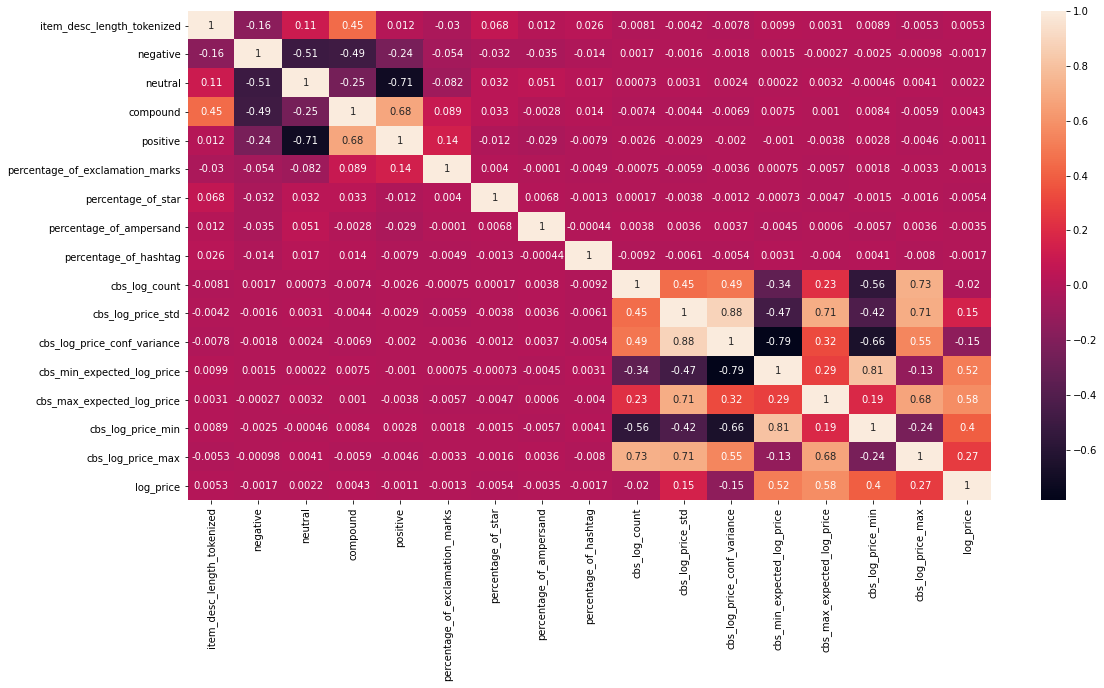

In [90]:
corrMatrix  = df_corr.corr()

plt.figure(figsize = (18,9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Percentage of hashtag, Percentage of ampersand, Percentage of star, Percentage of exclamation marks
has a low correlation with log price and thus we are dropping.



# X_train and X_test

In [91]:
X_train = scipy.sparse.hstack((X_brand_train,
                               df_train_transform,
                               tfidf_vectorizer_vectors_train,
                               item_shipping_dummies_train,
                               train_name,
                               np.array(df_train_split['negative'])[:,None],
                               np.array(df_train_split['neutral'])[:,None],
                               np.array(df_train_split['compound'])[:,None],
                               np.array(df_train_split['positive'])[:,None]
                              )).tocsr().astype('float32')

X_test = scipy.sparse.hstack((X_brand_test,
                              df_test_transform,
                              tfidf_vectorizer_vectors_test,
                              item_shipping_dummies_test,
                              test_name,
                              np.array(df_test_split['negative'])[:,None],
                              np.array(df_test_split['neutral'])[:,None],
                              np.array(df_test_split['compound'])[:,None],
                              np.array(df_test_split['positive'])[:,None]
                              )).tocsr().astype('float32')

y_train = df_train_split['log_price']
y_test = df_test_split['log_price']

print("X_train Shape is ",X_train.shape)
print("X_test Shape is ",X_test.shape)
print("y_train Shape is ",y_train.shape)
print("y_test Shape is ",y_test.shape)

X_train Shape is  (374770, 16183)
X_test Shape is  (124912, 16183)
y_train Shape is  (374770,)
y_test Shape is  (124912,)


In [92]:
print(train_cbs_feats.shape, test_cbs_feats.shape)
print(X_brand_train.shape, X_brand_test.shape)
print(df_train_transform.shape, df_test_transform.shape)
print(tfidf_vectorizer_vectors_train.shape, tfidf_vectorizer_vectors_test.shape)
print(train_name.shape, test_name.shape)

(374770, 7) (124912, 7)
(374770, 3260) (124912, 3260)
(374770, 874) (124912, 874)
(374770, 5000) (124912, 5000)
(374770, 7043) (124912, 7043)


In [93]:
from scipy import sparse
import pandas as pd
# Uncomment out to save for the first time. Subsequent times only need to load
# sparse.save_npz("X_train5.npz", X_train)
# sparse.save_npz("X_test5.npz", X_test)
# y_train.to_pickle("y_train5")
# y_test.to_pickle("y_test5")


#Keep uncommented to load. 
X_train = sparse.load_npz("X_train5.npz")
X_test = sparse.load_npz("X_test5.npz")

y_train = pd.read_pickle("y_train5")
y_test = pd.read_pickle("y_test5")

# LightGBM with Tuning

In [95]:
from lightgbm import LGBMRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [96]:
#below are using the default/typical values 
lgbm_params ={
            'learning_rate': 0.1,
            'n_estimators': 100,
            'num_leaves': 31,
            'max_depth' : 7,
            'boosting_type' : ['gbdt'],
            'min_child_samples': 20, 
            'objective': 'regression'
}

In [97]:
lgbm_model = LGBMRegressor(**lgbm_params)
lgbm_model.fit(X_train, y_train, early_stopping_rounds=None,verbose=True)

lgbm_pred_train = lgbm_model.predict(X_train)
lgbm_pred_test  = lgbm_model.predict(X_test)

print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lgbm_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lgbm_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lgbm_pred_train)))
print('Train R^2:',r2_score(y_train, lgbm_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lgbm_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lgbm_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lgbm_pred_test)))
print('Test R^2:',r2_score(y_test, lgbm_pred_test))

Train Mean Absolute Error: 0.4366009718487555
Train Mean Squared Error: 0.32051051152812754
Train Root Mean Squared Error: 0.5661364778285599
Train R^2: 0.4223248729053366
------------------------------
Test Mean Absolute Error: 0.4378350683536491
Test Mean Squared Error: 0.32641823619882754
Test Root Mean Squared Error: 0.5713302339267786
Test R^2: 0.4152154955780698


In [59]:
adjParams = {
    'learning_rate': [ 0.1,0.2,0.3],
    'n_estimators': [200,300,400],
    'num_leaves': [60,80,100,120,140],
    'max_depth' : [40,60,80,100],
    'boosting_type' : ['gbdt']  
            }

lgbm_params ={
    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    'min_child_samples': 20, 
    'objective': 'regression'
             }


In [60]:
lgbm_model = LGBMRegressor(**lgbm_params)
# Create the grid
grid = GridSearchCV(lgbm_model, adjParams, verbose=1, cv=3, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train,
         early_stopping_rounds=None,
         verbose=True)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed: 49.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 82.2min finished


GridSearchCV(cv=3,
             estimator=LGBMRegressor(colsample_bytree=0.8,
                                     objective='regression', subsample=0.9),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [40, 60, 80, 100],
                         'n_estimators': [200, 300, 400],
                         'num_leaves': [60, 80, 100, 120, 140]},
             verbose=1)

In [61]:
print('Best parameters found for LightGBM by grid search are:', grid.best_params_)

Best parameters found for LightGBM by grid search are: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 80, 'n_estimators': 400, 'num_leaves': 140}


In [98]:
lgbm_tuned_params ={
    'learning_rate': 0.1,
    'n_estimators': 400,
    'num_leaves': 140,
    'max_depth' : 80,
    'boosting_type' : 'gbdt',
    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    'min_child_samples': 20, 
    'objective': 'regression'
             }

lgbm_tune_model = LGBMRegressor(**lgbm_tuned_params)
lgbm_tune_model.fit(X_train, y_train,early_stopping_rounds=None,verbose=True)

LGBMRegressor(colsample_bytree=0.8, max_depth=80, n_estimators=400,
              num_leaves=140, objective='regression', subsample=0.9)

In [99]:
lgbm_pred_train_tuned = lgbm_tune_model.predict(X_train)
lgbm_pred_test_tuned  = lgbm_tune_model.predict(X_test)

In [100]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lgbm_pred_train_tuned))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lgbm_pred_train_tuned))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lgbm_pred_train_tuned)))
print('Train R^2:',r2_score(y_train, lgbm_pred_train_tuned))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lgbm_pred_test_tuned))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lgbm_pred_test_tuned))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lgbm_pred_test_tuned)))
print('Test R^2:',r2_score(y_test, lgbm_pred_test_tuned))

Train Mean Absolute Error: 0.3206032083347721
Train Mean Squared Error: 0.17779382482383974
Train Root Mean Squared Error: 0.4216560503821091
Train R^2: 0.6795516319821401
------------------------------
Test Mean Absolute Error: 0.3561605971225633
Test Mean Squared Error: 0.22558093338662222
Test Root Mean Squared Error: 0.47495361182606266
Test R^2: 0.595867449460821


# Ridge Regression 

In [101]:
from sklearn.linear_model import Ridge

In [102]:
ridge_model = Ridge(solver="sag", fit_intercept=True, random_state=150)
ridge_model.fit(X_train, y_train) 
ridge_model_pred_train = ridge_model.predict(X_train)
ridge_model_pred_test = ridge_model.predict(X_test)

In [103]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, ridge_model_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, ridge_model_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ridge_model_pred_train)))
print('Train R^2:',r2_score(y_train, ridge_model_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_model_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_model_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_model_pred_test)))
print('Test R^2:',r2_score(y_test, ridge_model_pred_test))

Train Mean Absolute Error: 0.36249498347266146
Train Mean Squared Error: 0.22854884565177827
Train Root Mean Squared Error: 0.4780678253676755
Train R^2: 0.5880728440706908
------------------------------
Test Mean Absolute Error: 0.377465827901293
Test Mean Squared Error: 0.2494838268309533
Test Root Mean Squared Error: 0.49948356012080447
Test R^2: 0.5530449593332196


In [13]:
ridge_model = Ridge()
params_Ridge = {'alpha': [50,20,10,6,2,1,0.1,0.01], 
                "fit_intercept": [True, False], 
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
               }
Ridge_GS = GridSearchCV(ridge_model, param_grid=params_Ridge, verbose=1, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.5min finished


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [50, 20, 10, 6, 2, 1, 0.1, 0.01],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             verbose=1)

In [14]:
print('Best parameters found for Ridge Regression by Grid Search are:', Ridge_GS.best_params_)

Best parameters found for Ridge Regression by Grid Search are: {'alpha': 6, 'fit_intercept': True, 'solver': 'sparse_cg'}


In [104]:
ridge_model_tuned = Ridge(alpha=6,solver="sag", fit_intercept=True)
ridge_model_tuned.fit(X_train, y_train) 
ridge_model_tuned_pred_train = ridge_model_tuned.predict(X_train)
ridge_model_tuned_pred_test = ridge_model_tuned.predict(X_test)

In [105]:
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, ridge_model_tuned_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ridge_model_tuned_pred_train)))
print('Train R^2:',r2_score(y_train, ridge_model_tuned_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_model_tuned_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_model_tuned_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_model_tuned_pred_test)))
print('Test R^2:',r2_score(y_test, ridge_model_tuned_pred_test))

Train Mean Squared Error: 0.23129845681694883
Train Root Mean Squared Error: 0.4809349819018667
Train R^2: 0.5831170565936196
------------------------------
Test Mean Absolute Error: 0.3768053332469826
Test Mean Squared Error: 0.24839690265434344
Test Root Mean Squared Error: 0.498394324460405
Test R^2: 0.5549922047548137


# Ensemble

In [108]:
from sklearn.ensemble import VotingRegressor
voting_ensemble = VotingRegressor([('lightgbm', lgbm_tune_model), ('ridge', ridge_model_tuned)])
voting_ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(colsample_bytree=0.8, max_depth=80,
                                           n_estimators=400, num_leaves=140,
                                           objective='regression',
                                           subsample=0.9)),
                            ('ridge', Ridge(alpha=6, solver='sag'))])

In [109]:
ensemble_train = voting_ensemble.predict(X_train)
ensemble_test = voting_ensemble.predict(X_test)

In [110]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, ensemble_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, ensemble_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ensemble_train)))
print('Train R^2:',r2_score(y_train, ensemble_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, ensemble_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, ensemble_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ensemble_test)))
print('Test R^2:',r2_score(y_test, ensemble_test))

Train Mean Absolute Error: 0.334808526312298
Train Mean Squared Error: 0.19402084652767468
Train Root Mean Squared Error: 0.4404779750767054
Train R^2: 0.6503047071919431
------------------------------
Test Mean Absolute Error: 0.3578400027259986
Test Mean Squared Error: 0.22627932091821437
Test Root Mean Squared Error: 0.475688260227446
Test R^2: 0.5946162748594492
